<a href="https://colab.research.google.com/github/sushily1997/ML_Assignments/blob/main/Decision_Trees_Implementation_Classsification_And_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.

# Importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.api as sm

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Exploration**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/seeds_dataset.csv')
df

Area  Perimeter  Compactness  Length_of_ kernel  Width_of_kernel  \
0    15.26      14.84       0.8710              5.763            3.312   
1    14.88      14.57       0.8811              5.554            3.333   
2    14.29      14.09       0.9050              5.291            3.337   
3    13.84      13.94       0.8955              5.324            3.379   
4    16.14      14.99       0.9034              5.658            3.562   
..     ...        ...          ...                ...              ...   
205  12.19      13.20       0.8783              5.137            2.981   
206  11.23      12.88       0.8511              5.140            2.795   
207  13.20      13.66       0.8883              5.236            3.232   
208  11.84      13.21       0.8521              5.175            2.836   
209  12.30      13.34       0.8684              5.243            2.974   

     Asymmetry_coefficient  Length_of_kernel_groove  Class_(1, 2, 3)  
0                    2.221                    5.220                1  
1                    1.018                    4.956                1  
2                    2.699                    4.825                1  
3                    2.259                    4.805                1  
4                    1.355                    5.175                1  
..                     ...                      ...              ...  
205                  3.631                    4.870                3  
206                  4.325                    5.003                3  
207                  8.315                    5.056                3  
208                  3.598                    5.044                3  
209                  5.637                    5.063                3  

[210 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_ kernel        210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class_(1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


**Missing value check**

In [ ]:
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length_of_ kernel          0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class_(1, 2, 3)            0
dtype: int64

**Independent and dependent Variables** 

*   variable 'Target' is the dependent feature 

*   others are feature/independent variables. Feature selection technique will be used to select features for model

In [ ]:
df['Class_(1, 2, 3)'].value_counts()

1    70
2    70
3    70
Name: Class_(1, 2, 3), dtype: int64

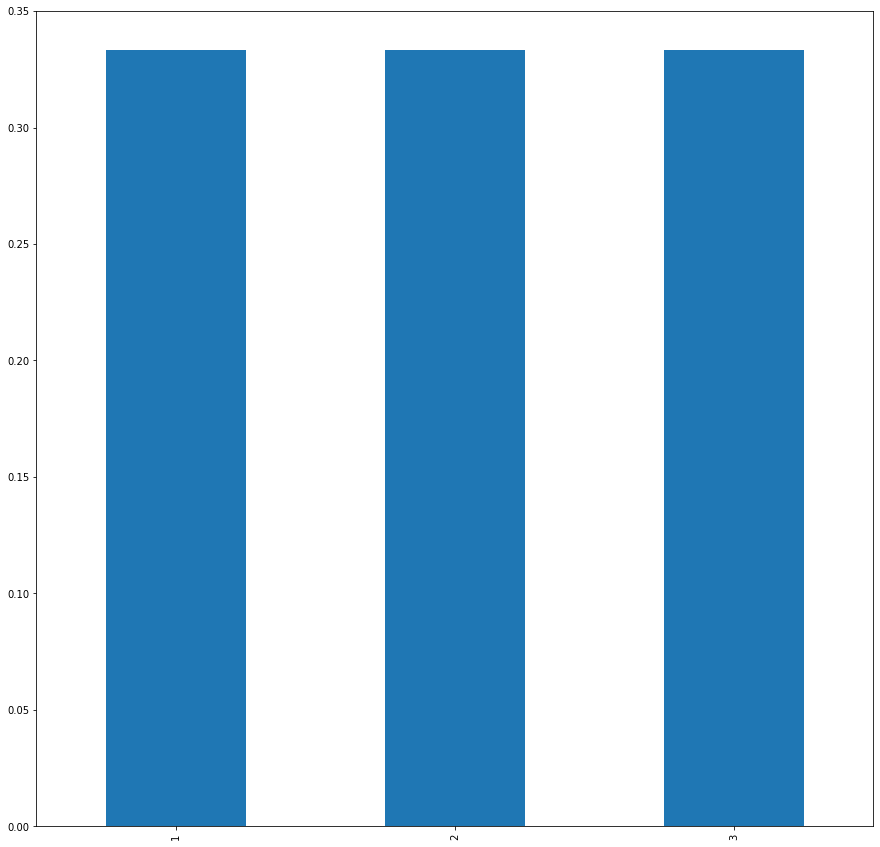

In [ ]:
df['Class_(1, 2, 3)'].value_counts(normalize=True).plot.bar()

**Statistical summary of independent Features**

In [ ]:
df.drop('Class_(1, 2, 3)', axis = 1).describe().T

count       mean       std      min       25%  \
Area                     210.0  14.847524  2.909699  10.5900  12.27000   
Perimeter                210.0  14.559286  1.305959  12.4100  13.45000   
Compactness              210.0   0.870999  0.023629   0.8081   0.85690   
Length_of_ kernel        210.0   5.628533  0.443063   4.8990   5.26225   
Width_of_kernel          210.0   3.258605  0.377714   2.6300   2.94400   
Asymmetry_coefficient    210.0   3.700201  1.503557   0.7651   2.56150   
Length_of_kernel_groove  210.0   5.408071  0.491480   4.5190   5.04500   

                              50%        75%      max  
Area                     14.35500  17.305000  21.1800  
Perimeter                14.32000  15.715000  17.2500  
Compactness               0.87345   0.887775   0.9183  
Length_of_ kernel         5.52350   5.979750   6.6750  
Width_of_kernel           3.23700   3.561750   4.0330  
Asymmetry_coefficient     3.59900   4.768750   8.4560  
Length_of_kernel_groove   5.22300   5.877000   6.5500

**Statistical test for Normality**

In [ ]:
for feature in df.drop('Class_(1, 2, 3)', axis = 1).columns:
    print(feature)
    p_value = stats.normaltest(df[feature])[1]
    if p_value > 0.05:
        print('Normality test failed for feature: ', feature)

Area
Perimeter
Compactness
Length_of_ kernel
Width_of_kernel
Asymmetry_coefficient
Normality test failed for feature:  Asymmetry_coefficient
Length_of_kernel_groove


**Distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


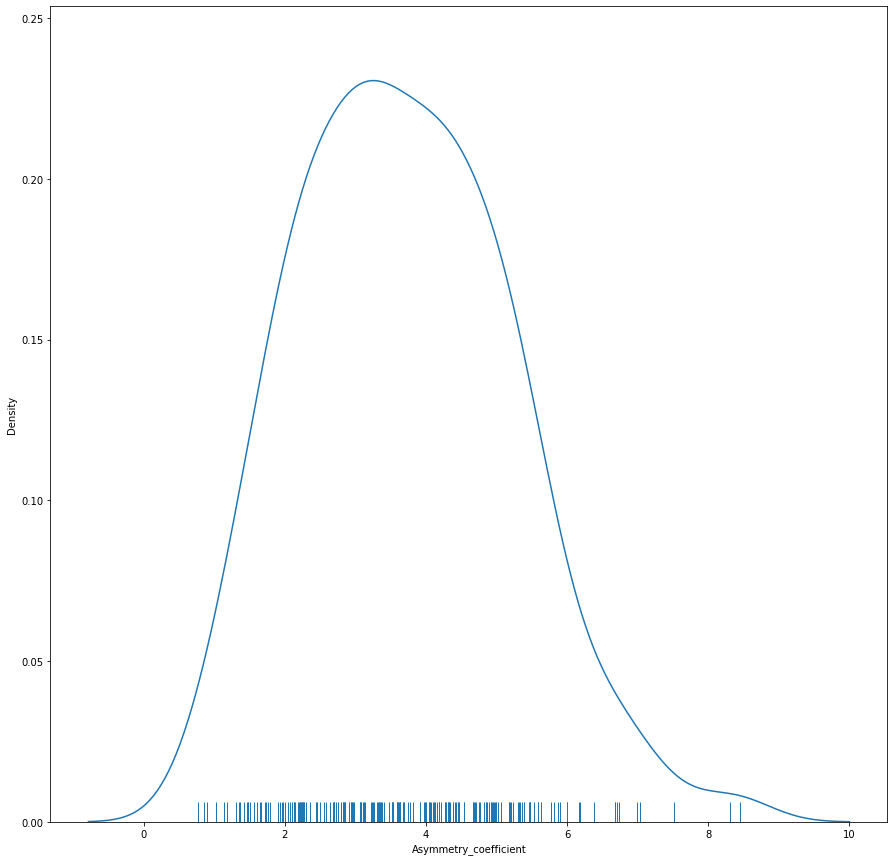

In [ ]:
sns.distplot(df['Asymmetry_coefficient'], rug=True, hist=False
             )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


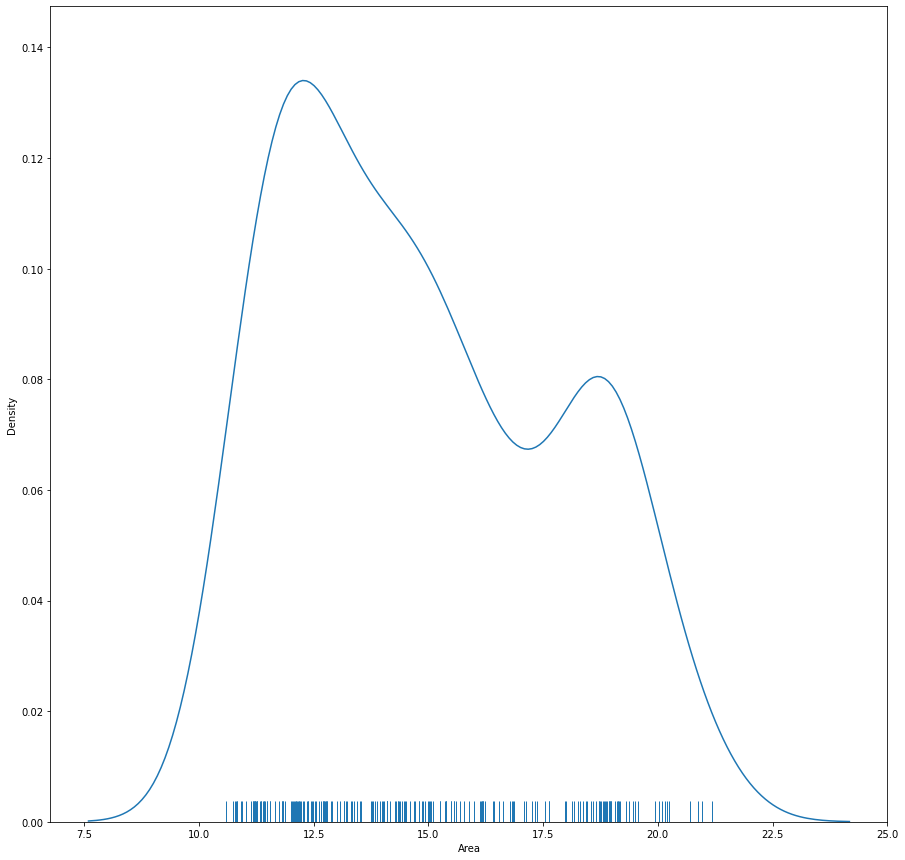

In [ ]:
sns.distplot(df['Area'], rug=True, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


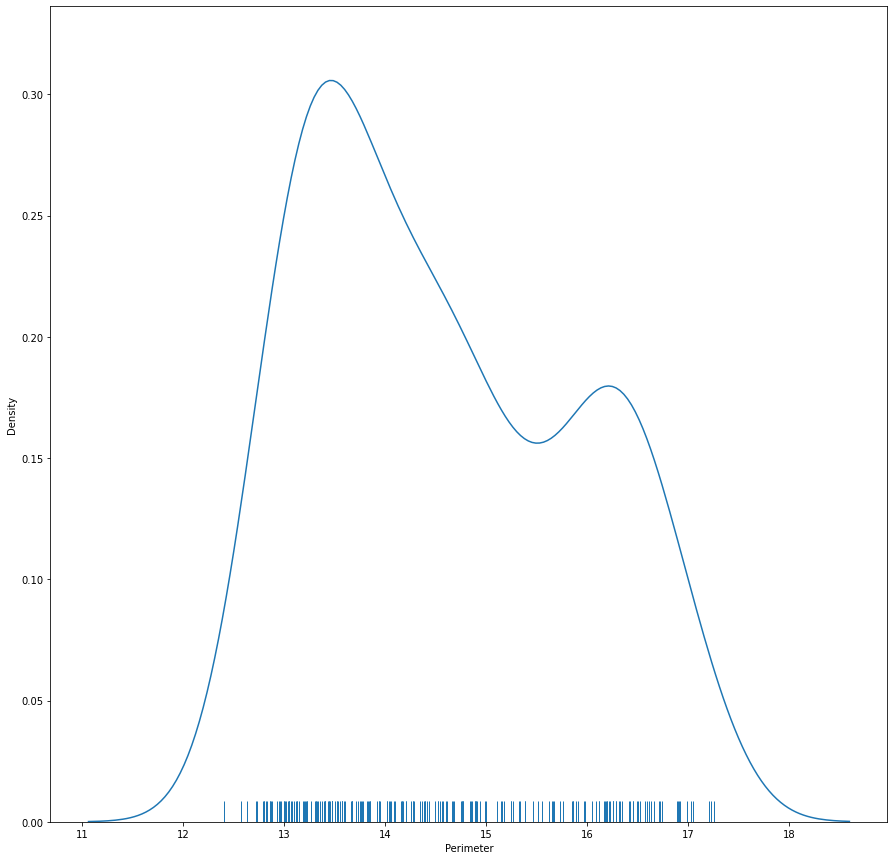

In [ ]:
sns.distplot(df['Perimeter'], rug=True, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


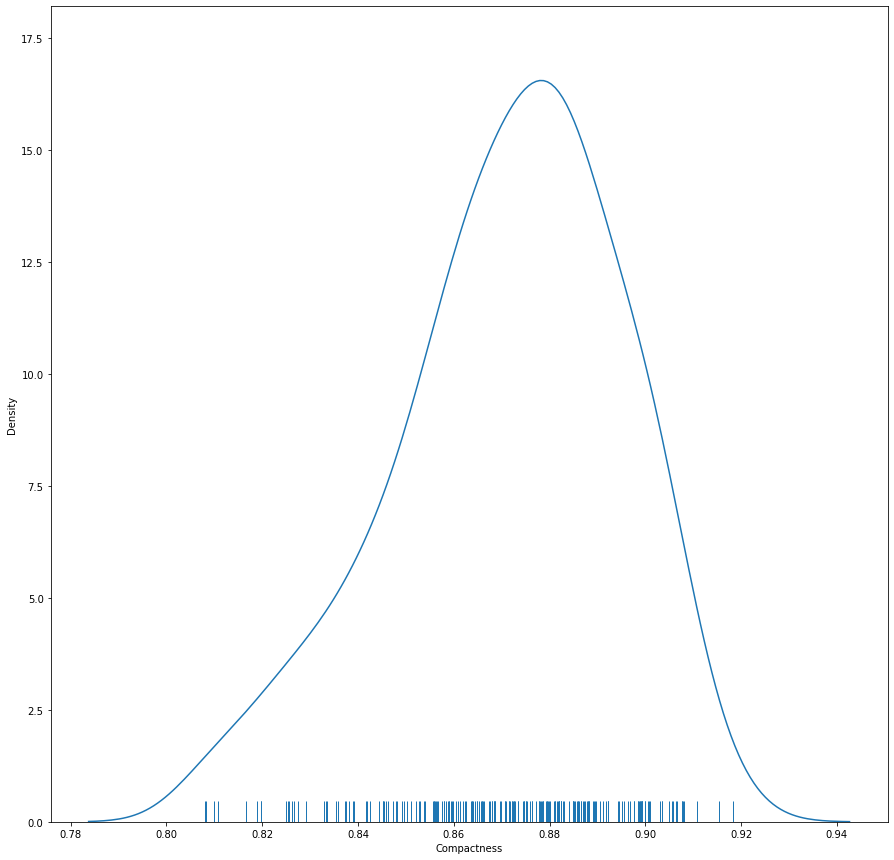

In [ ]:
sns.distplot(df['Compactness'], rug=True, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


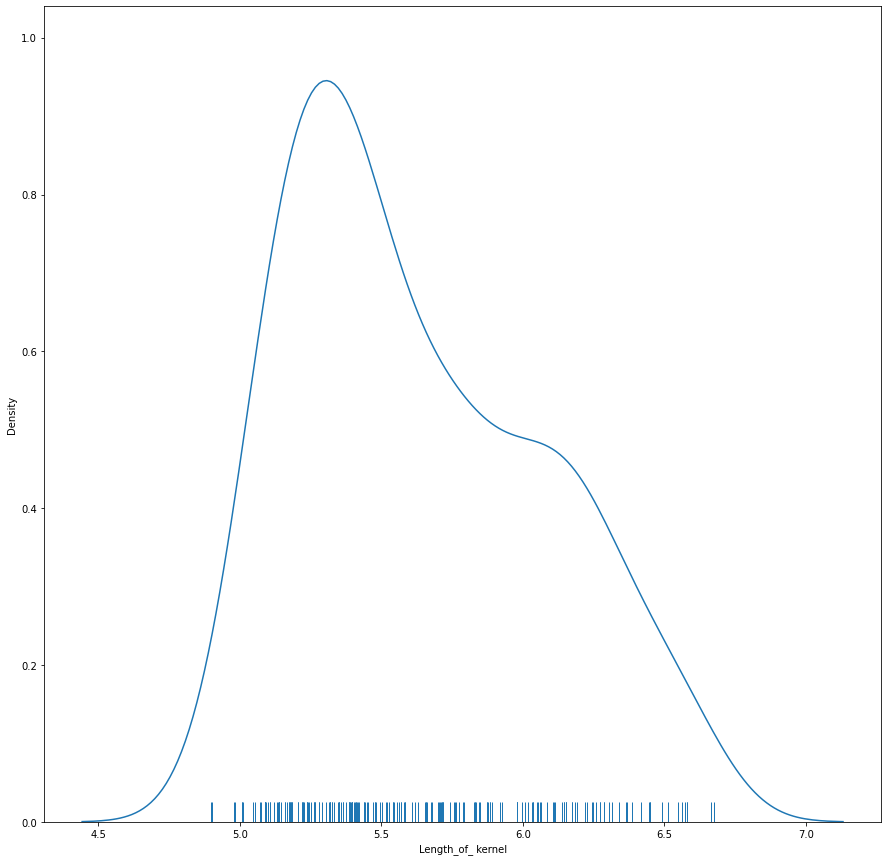

In [ ]:
sns.distplot(df['Length_of_ kernel'], rug=True, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


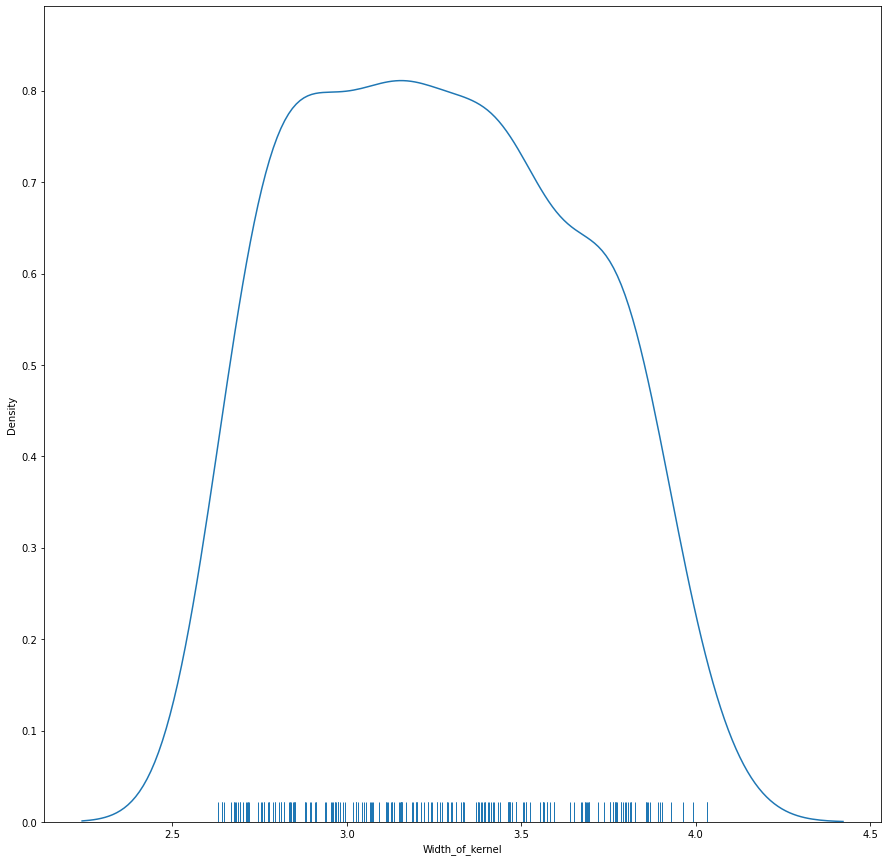

In [ ]:
sns.distplot(df['Width_of_kernel'], rug=True, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


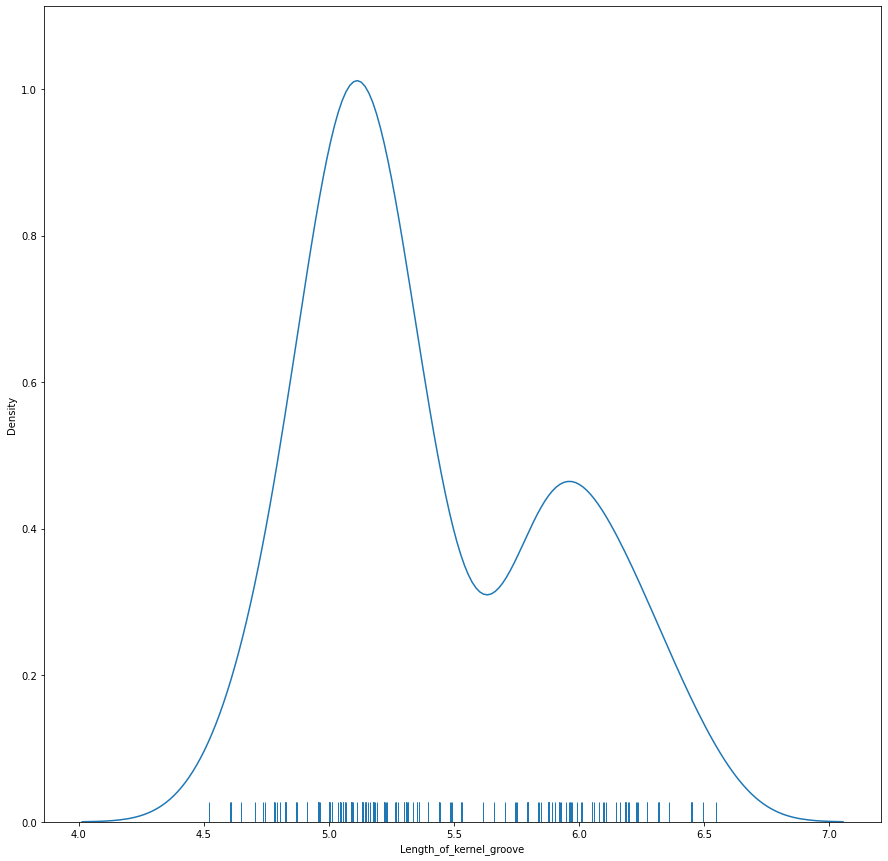

In [ ]:
sns.distplot(df['Length_of_kernel_groove'], rug=True, hist=False)

**Check dataset outliers**

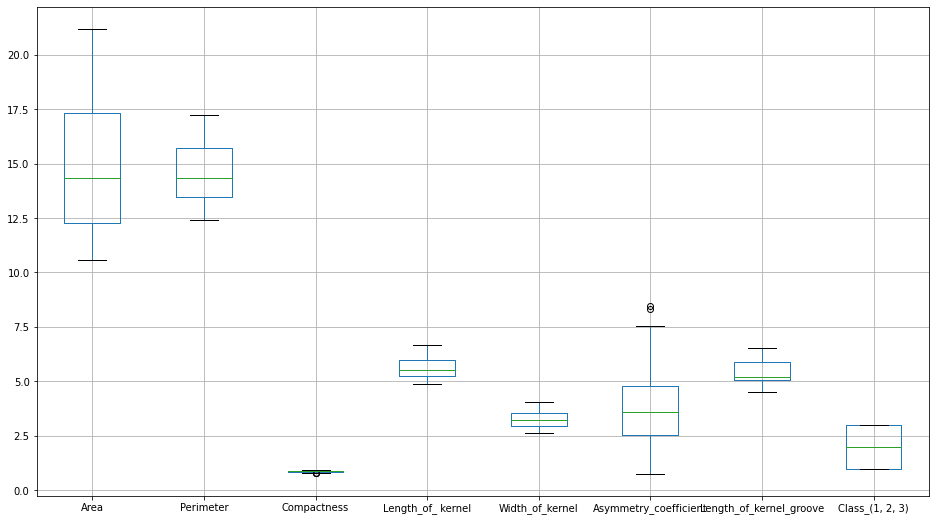

In [ ]:
df.boxplot(figsize=(16,9));

In [ ]:
df.describe()

Area   Perimeter  Compactness  Length_of_ kernel  \
count  210.000000  210.000000   210.000000         210.000000   
mean    14.847524   14.559286     0.870999           5.628533   
std      2.909699    1.305959     0.023629           0.443063   
min     10.590000   12.410000     0.808100           4.899000   
25%     12.270000   13.450000     0.856900           5.262250   
50%     14.355000   14.320000     0.873450           5.523500   
75%     17.305000   15.715000     0.887775           5.979750   
max     21.180000   17.250000     0.918300           6.675000   

       Width_of_kernel  Asymmetry_coefficient  Length_of_kernel_groove  \
count       210.000000             210.000000               210.000000   
mean          3.258605               3.700201                 5.408071   
std           0.377714               1.503557                 0.491480   
min           2.630000               0.765100                 4.519000   
25%           2.944000               2.561500                 5.045000   
50%           3.237000               3.599000                 5.223000   
75%           3.561750               4.768750                 5.877000   
max           4.033000               8.456000                 6.550000   

       Class_(1, 2, 3)  
count       210.000000  
mean          2.000000  
std           0.818448  
min           1.000000  
25%           1.000000  
50%           2.000000  
75%           3.000000  
max           3.000000

**Pair plot**

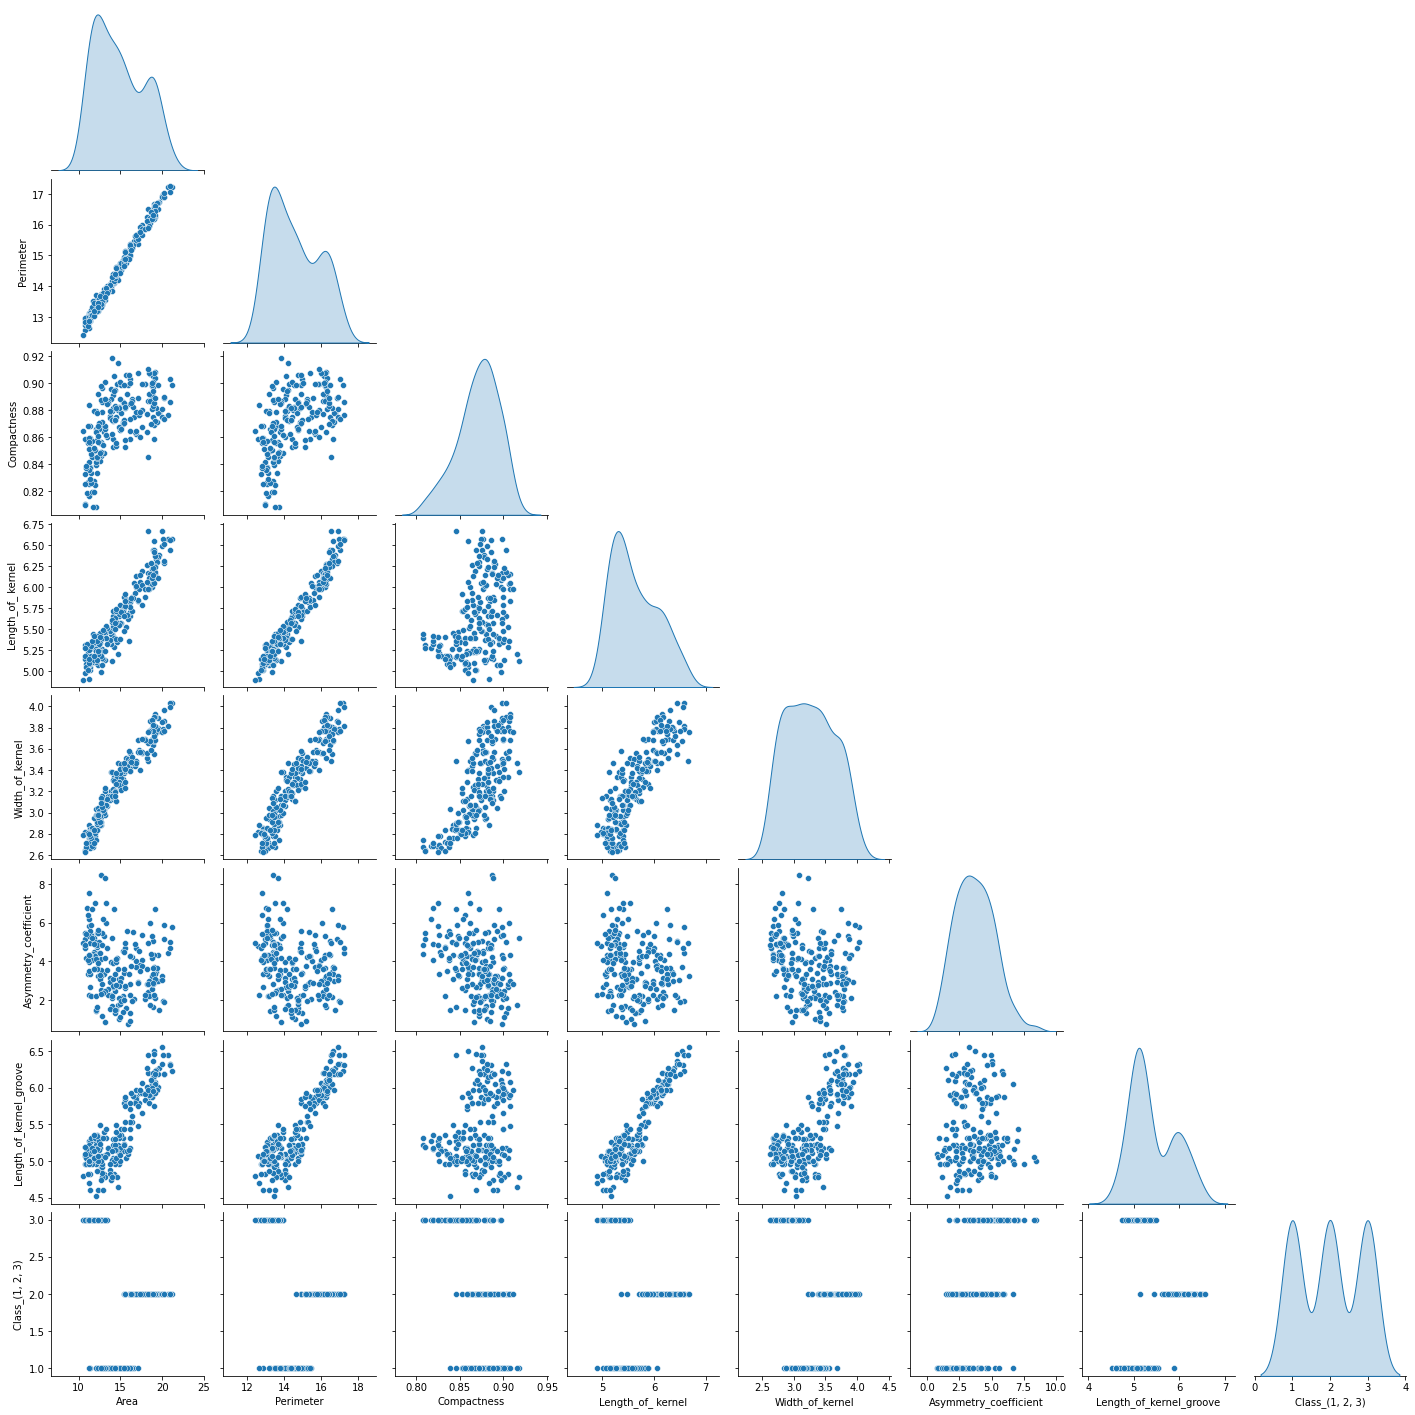

In [ ]:
sns.pairplot(df, corner=True, diag_kind="kde")

*  Pair plot proove that feaures are correlated

**Feature selection**

Pearson correlation test

In [ ]:
Xnum = df.drop('Class_(1, 2, 3)', axis = 1)
ynum = df['Class_(1, 2, 3)']

In [ ]:
pd.DataFrame(
    [stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

Pearson Corr.  p-value
Area                           -0.3461   0.0000
Perimeter                      -0.3279   0.0000
Compactness                    -0.5310   0.0000
Length_of_ kernel              -0.2573   0.0002
Width_of_kernel                -0.4235   0.0000
Asymmetry_coefficient           0.5773   0.0000
Length_of_kernel_groove         0.0243   0.7263

*   length_of_kernel_groove feature have p_value > 0.05. This feature can be discarded for model

**Anova test**

In [ ]:
def f_test_target(feature, df_arg):
    data_dict = {}
    target_class = ['class_1', 'class_2', 'class_3']
    for class_id in range(1, 4):
        data_dict[target_class[class_id - 1]] = list(df_arg.loc[df_arg['Class_(1, 2, 3)'] == class_id][feature])
    df_new = pd.DataFrame(data_dict)
    f_start, p_value = stats.f_oneway(df_new[target_class[0]], df_new[target_class[1]], df_new[target_class[2]])
    if p_value > 0.05:
        print(feature, 'One-way ANOVA, Mean across different class are same')
    else:
        print(feature, 'One-way ANOVA, Mean across different class are different')
    

In [ ]:
for feature in df.drop('Class_(1, 2, 3)', axis = 1).columns:
    f_test_target(feature, df)

Area One-way ANOVA, Mean across different class are different
Perimeter One-way ANOVA, Mean across different class are different
Compactness One-way ANOVA, Mean across different class are different
Length_of_ kernel One-way ANOVA, Mean across different class are different
Width_of_kernel One-way ANOVA, Mean across different class are different
Asymmetry_coefficient One-way ANOVA, Mean across different class are different
Length_of_kernel_groove One-way ANOVA, Mean across different class are different


**Feature Scaling**

In [ ]:
df_X = df.drop('Class_(1, 2, 3)', axis =1)
df_y = df['Class_(1, 2, 3)']
scaler = StandardScaler().fit(df_X)
df_X_scaled = pd.DataFrame(scaler.transform(df_X), columns = df_X.columns)
df_X_scaled.describe().T

count          mean       std       min       25%  \
Area                     210.0 -3.383537e-16  1.002389 -1.466714 -0.887955   
Perimeter                210.0  1.184238e-16  1.002389 -1.649686 -0.851433   
Compactness              210.0  1.285744e-15  1.002389 -2.668236 -0.598079   
Length_of_ kernel        210.0 -2.097793e-15  1.002389 -1.650501 -0.828682   
Width_of_kernel          210.0 -3.383537e-16  1.002389 -1.668209 -0.834907   
Asymmetry_coefficient    210.0 -3.383537e-16  1.002389 -1.956769 -0.759148   
Length_of_kernel_groove  210.0 -8.987520e-17  1.002389 -1.813288 -0.740495   

                              50%       75%       max  
Area                    -0.169674  0.846599  2.181534  
Perimeter               -0.183664  0.887069  2.065260  
Compactness              0.103993  0.711677  2.006586  
Length_of_ kernel       -0.237628  0.794595  2.367533  
Width_of_kernel         -0.057335  0.804496  2.055112  
Asymmetry_coefficient   -0.067469  0.712379  3.170590  
Length_of_kernel_groove -0.377459  0.956394  2.328998

**Outlier handling**

In [ ]:
df_X_scaled = np.clip(df_X_scaled, -3, 3)
df_X_scaled.describe().T

count          mean       std       min       25%  \
Area                     210.0 -3.383537e-16  1.002389 -1.466714 -0.887955   
Perimeter                210.0  1.184238e-16  1.002389 -1.649686 -0.851433   
Compactness              210.0  1.285744e-15  1.002389 -2.668236 -0.598079   
Length_of_ kernel        210.0 -2.097793e-15  1.002389 -1.650501 -0.828682   
Width_of_kernel          210.0 -3.383537e-16  1.002389 -1.668209 -0.834907   
Asymmetry_coefficient    210.0 -1.177038e-03  0.998759 -1.956769 -0.759148   
Length_of_kernel_groove  210.0 -8.987520e-17  1.002389 -1.813288 -0.740495   

                              50%       75%       max  
Area                    -0.169674  0.846599  2.181534  
Perimeter               -0.183664  0.887069  2.065260  
Compactness              0.103993  0.711677  2.006586  
Length_of_ kernel       -0.237628  0.794595  2.367533  
Width_of_kernel         -0.057335  0.804496  2.055112  
Asymmetry_coefficient   -0.067469  0.712379  3.000000  
Length_of_kernel_groove -0.377459  0.956394  2.328998

**Evaluating model performance**

In [ ]:
df=df.sample(frac=1,random_state=3)
y=df['Class_(1, 2, 3)']
X=df.drop('Class_(1, 2, 3)',axis=1)

In [ ]:
print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


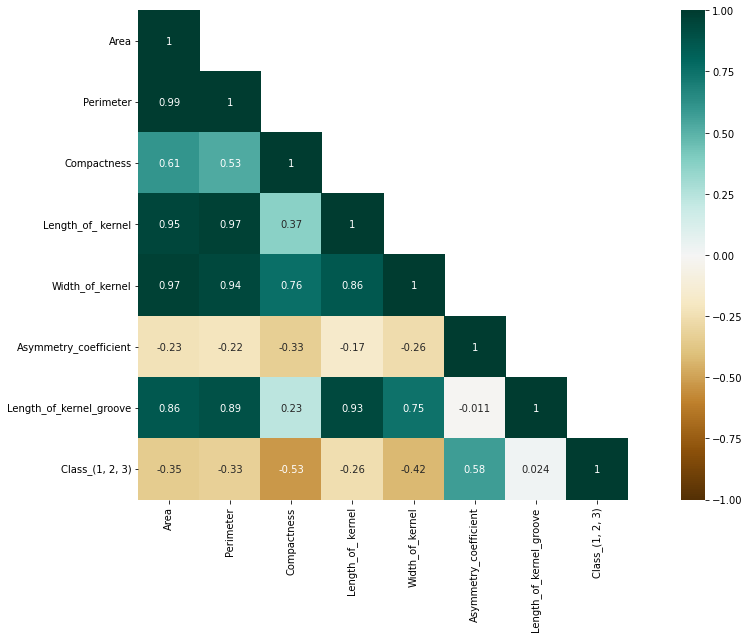

In [ ]:
# columns = copy.deepcopy(numeric_features)
# columns.append('y')
# data = df_train_org[columns]
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

**VIF factor for multicollinierity**

In [ ]:
#X = df[list(df.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                   Column
1  19479.829297                Perimeter
3   8025.164434        Length_of_ kernel
4   7906.280941          Width_of_kernel
2   5682.282348              Compactness
0   5096.572464                     Area
6   1324.319458  Length_of_kernel_groove
5      9.453784    Asymmetry_coefficient

*   Very high multicollinierity among features

In [ ]:
# Remove feature area and apply VIF test
X1 = X.drop(['Perimeter'], axis = 1)

# For each X, calculate VIF and save in dataframe

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['Column'] = X1.columns
vif

VIF                   Column
0  3741.956927                     Area
1  4368.536819              Compactness
2  3026.544441        Length_of_ kernel
3  7871.430199          Width_of_kernel
4     9.444978    Asymmetry_coefficient
5  1320.493455  Length_of_kernel_groove

In [ ]:
# Remove feature area, perimeter and apply VIF test
X2 = X1.drop(['Length_of_ kernel','Compactness'], axis = 1)
vif = pd.DataFrame()
# For each X, calculate VIF and save in dataframe
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['Column'] = X2.columns
vif

VIF                   Column
0  157.687981                     Area
1  365.684686          Width_of_kernel
2    8.674978    Asymmetry_coefficient
3  228.997048  Length_of_kernel_groove

In [ ]:
X['Diff_AreaPerimeter'] = X['Area'] - X['Perimeter']
X['Diff_LengthWidth'] = X['Length_of_ kernel'] - X['Width_of_kernel']


X3 = X.drop(['Area', 'Perimeter', 'Length_of_ kernel', 'Width_of_kernel'], axis=1)

X3.head()

Compactness  Asymmetry_coefficient  Length_of_kernel_groove  \
164       0.8558                  6.388                    5.049   
86        0.8969                  1.649                    6.109   
122       0.8588                  4.286                    5.703   
168       0.8291                  4.337                    5.132   
128       0.8735                  1.910                    6.185   

     Diff_AreaPerimeter  Diff_LengthWidth  
164               -1.65             2.217  
86                 2.62             2.320  
122                0.79             2.375  
168               -1.77             2.508  
128                3.13             2.740

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['Column'] = X3.columns
vif

VIF                   Column
0   337.048906              Compactness
1     9.272849    Asymmetry_coefficient
2  1272.024168  Length_of_kernel_groove
3     6.248772       Diff_AreaPerimeter
4   407.923219         Diff_LengthWidth

In [ ]:
X3['ABS_Diff_AreaPerimeter'] = X3['Diff_AreaPerimeter'].abs()
X3['ABS_Diff_LengthWidth'] = X3['Diff_LengthWidth'].abs()
X4 = X3.drop(['Diff_AreaPerimeter','Diff_LengthWidth'],axis=1)
X4.sample(5)

Compactness  Asymmetry_coefficient  Length_of_kernel_groove  \
15        0.8993                  4.185                    4.781   
36        0.8734                  2.823                    5.527   
186       0.8198                  4.898                    5.352   
32        0.8529                  3.920                    5.299   
183       0.8575                  5.209                    5.135   

     ABS_Diff_AreaPerimeter  ABS_Diff_LengthWidth  
15                     0.31                 2.018  
36                     0.93                 2.362  
186                    1.64                 2.697  
32                     0.32                 2.531  
183                    1.42                 2.258

In [ ]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif_info['Column'] = X4.columns
vif_info.sort_values('VIF', ascending=False)

VIF                   Column
2  427.393962  Length_of_kernel_groove
0  218.663543              Compactness
4  157.262862     ABS_Diff_LengthWidth
1    7.402042    Asymmetry_coefficient
3    7.016359   ABS_Diff_AreaPerimeter

In [ ]:
X5= X4.drop(('Length_of_kernel_groove'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_info['Column'] = X5.columns
vif_info.sort_values('VIF', ascending=False)

VIF                  Column
3  93.426307    ABS_Diff_LengthWidth
0  83.729639             Compactness
1   7.149289   Asymmetry_coefficient
2   3.761417  ABS_Diff_AreaPerimeter

In [ ]:
X5.head()

Compactness  Asymmetry_coefficient  ABS_Diff_AreaPerimeter  \
164       0.8558                  6.388                    1.65   
86        0.8969                  1.649                    2.62   
122       0.8588                  4.286                    0.79   
168       0.8291                  4.337                    1.77   
128       0.8735                  1.910                    3.13   

     ABS_Diff_LengthWidth  
164                 2.217  
86                  2.320  
122                 2.375  
168                 2.508  
128                 2.740

In [ ]:
X5_train,X5_test, y_train, y_test = model_selection.train_test_split(X5, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X5_train.shape)
print('X_test dimension= ', X5_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (168, 4)
X_test dimension=  (42, 4)
y_train dimension=  (168,)
y_train dimension=  (42,)


In [ ]:
X5_train

Compactness  Asymmetry_coefficient  ABS_Diff_AreaPerimeter  \
206       0.8511                  4.325                    1.65   
161       0.8503                  4.271                    1.31   
174       0.8099                  5.182                    2.13   
53        0.8831                  3.328                    0.05   
93        0.9066                  6.001                    2.54   
..           ...                    ...                     ...   
21        0.8722                  2.688                    0.15   
36        0.8734                  2.823                    0.93   
5         0.8951                  2.462                    0.17   
156       0.8596                  3.347                    1.53   
73        0.9081                  2.936                    2.85   

     ABS_Diff_LengthWidth  
206                 2.345  
161                 2.540  
174                 2.637  
53                  2.305  
93                  2.177  
..                    ...  
21                  2.352  
36                  2.362  
5                   2.074  
156                 2.204  
73                  2.224  

[168 rows x 4 columns]

In [ ]:
df['Class_(1, 2, 3)'].value_counts()

3    70
2    70
1    70
Name: Class_(1, 2, 3), dtype: int64

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X5, y)

DecisionTreeClassifier()

In [ ]:
clf = tree.DecisionTreeClassifier(random_state= 1)
clf.fit(X5_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_train_pred = clf.predict(X5_train)
y_test_pred = clf.predict(X5_test)

In [ ]:
clf.score(X5_test, y_test)

0.7619047619047619

In [ ]:
clf.score(X5_train, y_train)

1.0

[Text(0.47685185185185186, 0.9545454545454546, 'X[2] <= 2.19\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.4398148148148148, 0.8636363636363636, 'X[0] <= 0.864\ngini = 0.62\nsamples = 132\nvalue = [53, 21, 58]'),
 Text(0.2037037037037037, 0.7727272727272727, 'X[2] <= 0.59\ngini = 0.345\nsamples = 59\nvalue = [6, 6, 47]'),
 Text(0.07407407407407407, 0.6818181818181818, 'X[0] <= 0.857\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.037037037037037035, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.1111111111111111, 0.5909090909090909, 'X[3] <= 2.498\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.07407407407407407, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.14814814814814814, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.6818181818181818, 'X[0] <= 0.858\ngini = 0.259\nsamples = 55\nvalue = [3, 5, 47]'),
 Text(0.25925925925925924, 0.5909090909090909, 'X[3] <= 2.939\ngini = 0.165\

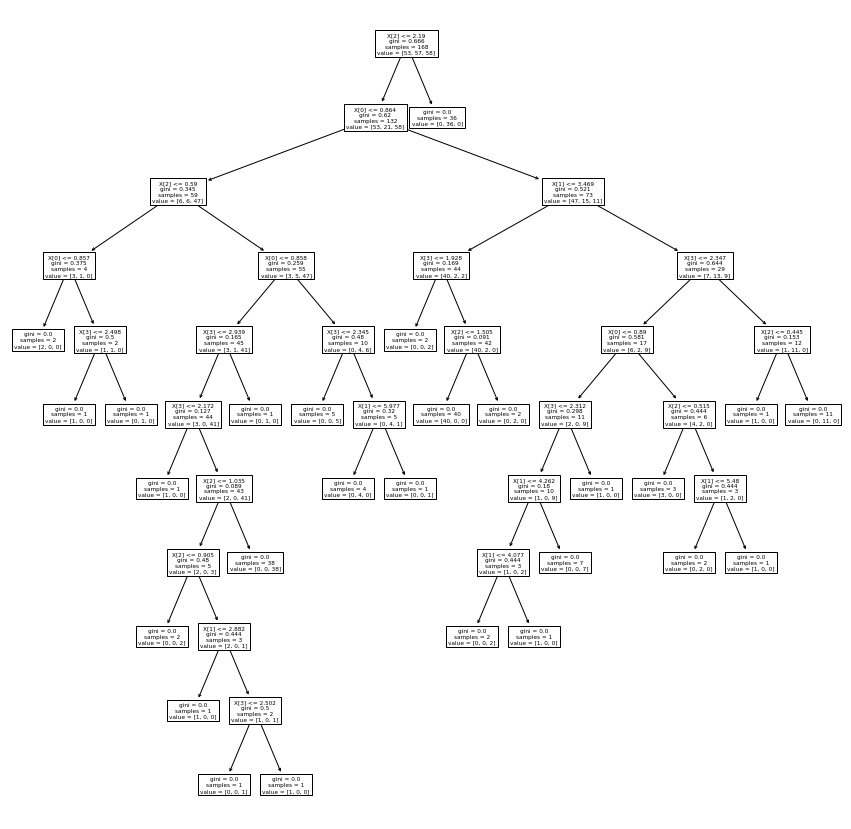

In [ ]:
tree.plot_tree(clf)

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X5_train, y_train)
y_pred_train = regressor.predict(X5_train)

In [ ]:
# R_square
R_square = clf.score(X5_train, y_train)
print('R square obtain for scikit learn library is :',R_square)

R square obtain for scikit learn library is : 1.0


In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[53,  0,  0],
       [ 0, 57,  0],
       [ 0,  0, 58]])

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7619047619047619


array([[11,  3,  3],
       [ 2, 10,  1],
       [ 1,  0, 11]])

In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=x.columns,
                       class_names=['Good Seed', "Bad Seed"],
                       filled=True)

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))

**Without setting any hyper-parameters**

In [ ]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5833333333333334, 0.9285714285714286, 'X[6] <= 5.597\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.3, 0.7857142857142857, 'X[0] <= 12.71\ngini = 0.507\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.13333333333333333, 0.6428571428571429, 'X[6] <= 4.724\ngini = 0.107\nsamples = 53\nvalue = [3, 0, 50]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(0.4666666666666667, 0.6428571428571429, 'X[5] <= 4.607\ngini = 0.267\nsamples = 58\nvalue = [49, 1, 8]'),
 Text(0.3333333333333333, 0.5, 'X[1] <= 13.44\ngini = 0.081\nsamples = 48\nvalue = [46, 1, 1]'),
 Text(0.26666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.35714285714285715, 'X[4] <= 3.464\ngini = 0.042\nsamples = 47\nvalue = [46, 1, 0]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.4666666666666667, 0.214

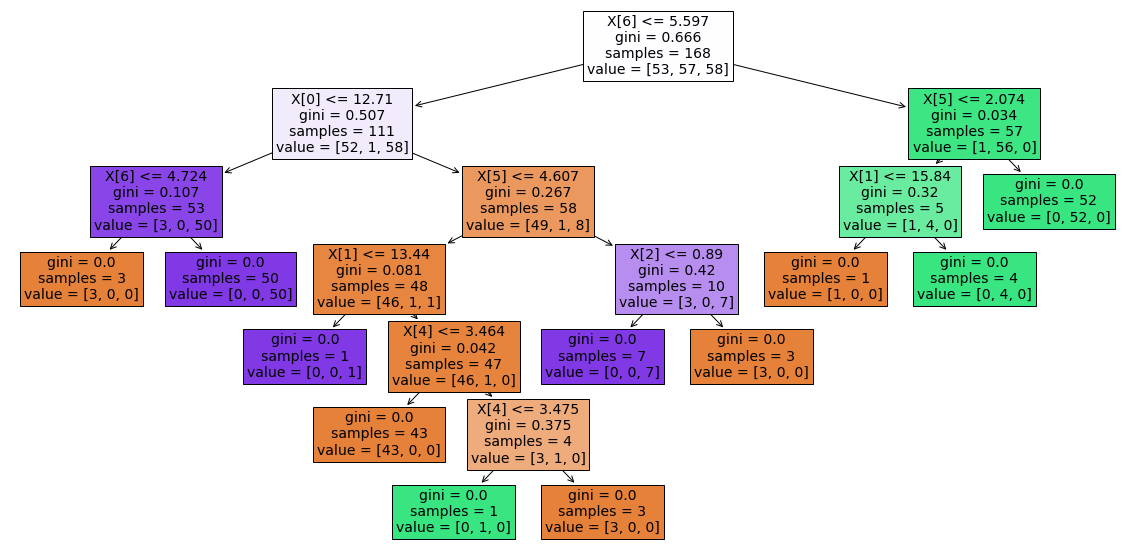

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_default, filled=True, fontsize=14)

In [ ]:
evaluate_model(dt_default)


Train Accuracy : 1.0
Train Confusion Matrix:
[[53  0  0]
 [ 0 57  0]
 [ 0  0 58]]
--------------------------------------------------
Test Accuracy : 0.9047619047619048
Test Confusion Matrix:
[[14  1  2]
 [ 1 12  0]
 [ 0  0 12]]


**Controlling the depth of the tree**

In [ ]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5769230769230769, 0.875, 'X[6] <= 5.597\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 12.71\ngini = 0.507\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.15384615384615385, 0.375, 'X[6] <= 4.724\ngini = 0.107\nsamples = 53\nvalue = [3, 0, 50]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(0.46153846153846156, 0.375, 'X[5] <= 4.607\ngini = 0.267\nsamples = 58\nvalue = [49, 1, 8]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.081\nsamples = 48\nvalue = [46, 1, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [3, 0, 7]'),
 Text(0.8461538461538461, 0.625, 'X[5] <= 2.074\ngini = 0.034\nsamples = 57\nvalue = [1, 56, 0]'),
 Text(0.7692307692307693, 0.375, 'X[0] <= 17.59\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 

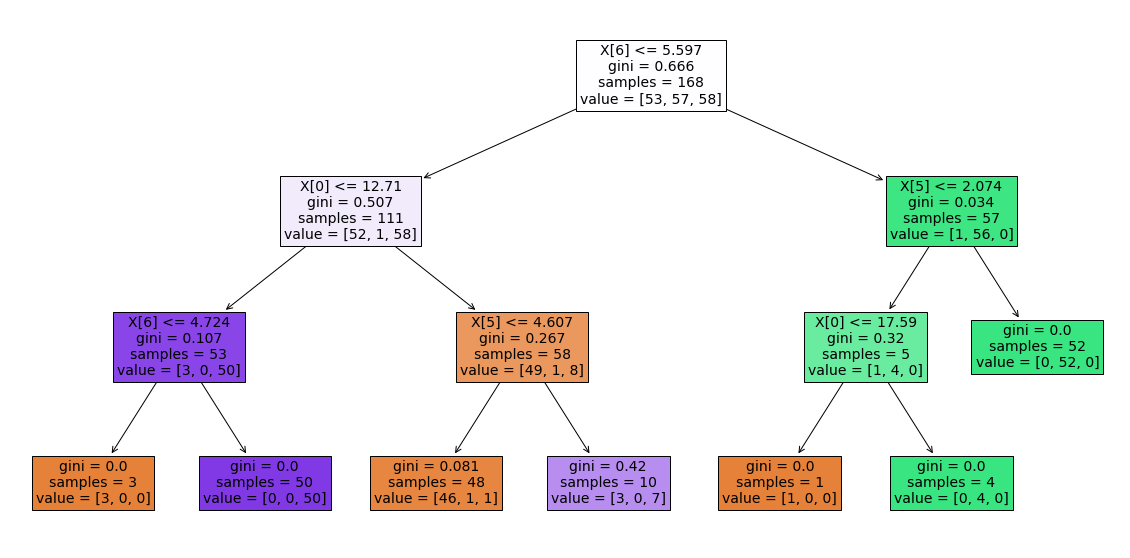

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_depth, filled=True, fontsize=14)

In [ ]:
evaluate_model(dt_depth)

Train Accuracy : 0.9702380952380952
Train Confusion Matrix:
[[50  0  3]
 [ 1 56  0]
 [ 1  0 57]]
--------------------------------------------------
Test Accuracy : 0.9285714285714286
Test Confusion Matrix:
[[15  0  2]
 [ 1 12  0]
 [ 0  0 12]]


**Specifying minimum samples before split**

In [ ]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

[Text(0.5909090909090909, 0.9166666666666666, 'X[6] <= 5.597\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.36363636363636365, 0.75, 'X[0] <= 12.71\ngini = 0.507\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[6] <= 4.724\ngini = 0.107\nsamples = 53\nvalue = [3, 0, 50]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(0.5454545454545454, 0.5833333333333334, 'X[5] <= 4.607\ngini = 0.267\nsamples = 58\nvalue = [49, 1, 8]'),
 Text(0.45454545454545453, 0.4166666666666667, 'X[1] <= 13.44\ngini = 0.081\nsamples = 48\nvalue = [46, 1, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.25, 'X[4] <= 3.464\ngini = 0.042\nsamples = 47\nvalue = [46, 1, 0]'),
 Text(0.45454545454545453, 0.08333333333333333, 'gini = 0.0\nsamples = 43\nvalu

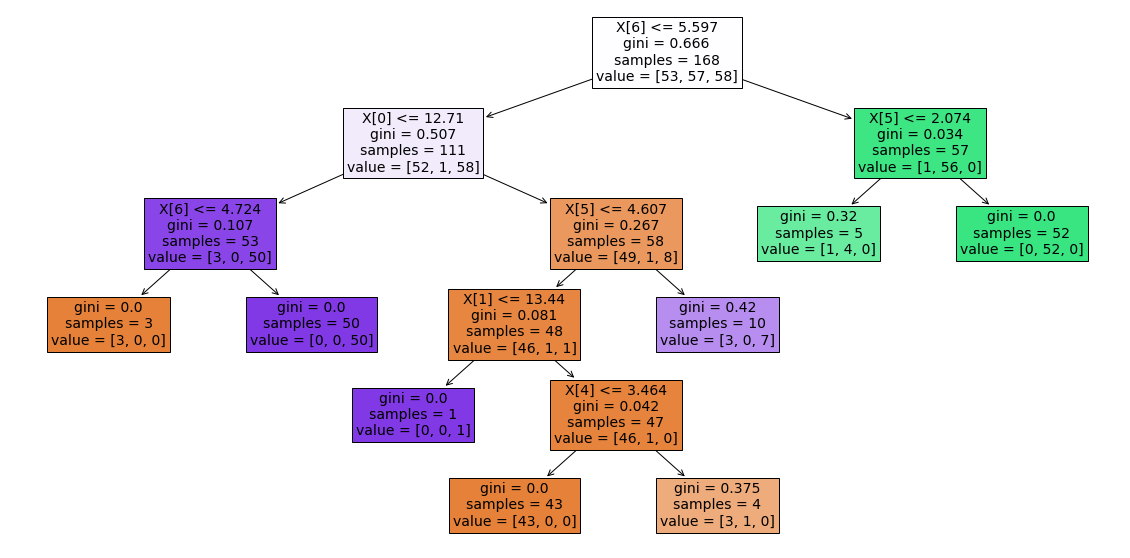

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_min_split, filled=True, fontsize=14)

In [ ]:
evaluate_model(dt_min_split)

Train Accuracy : 0.9702380952380952
Train Confusion Matrix:
[[49  1  3]
 [ 1 56  0]
 [ 0  0 58]]
--------------------------------------------------
Test Accuracy : 0.9285714285714286
Test Confusion Matrix:
[[15  0  2]
 [ 1 12  0]
 [ 0  0 12]]


**Specifying minimum samples in leaf node**

In [ ]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

[Text(0.5909090909090909, 0.875, 'X[6] <= 5.597\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.36363636363636365, 0.625, 'X[0] <= 12.71\ngini = 0.507\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.18181818181818182, 0.375, 'X[5] <= 4.097\ngini = 0.107\nsamples = 53\nvalue = [3, 0, 50]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.255\nsamples = 20\nvalue = [3, 0, 17]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.5454545454545454, 0.375, 'X[0] <= 13.64\ngini = 0.267\nsamples = 58\nvalue = [49, 1, 8]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.48\nsamples = 20\nvalue = [12, 0, 8]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [37, 1, 0]'),
 Text(0.8181818181818182, 0.625, 'X[0] <= 18.25\ngini = 0.034\nsamples = 57\nvalue = [1, 56, 0]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.095\nsamples = 20\nvalue = [1, 19, 0]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'

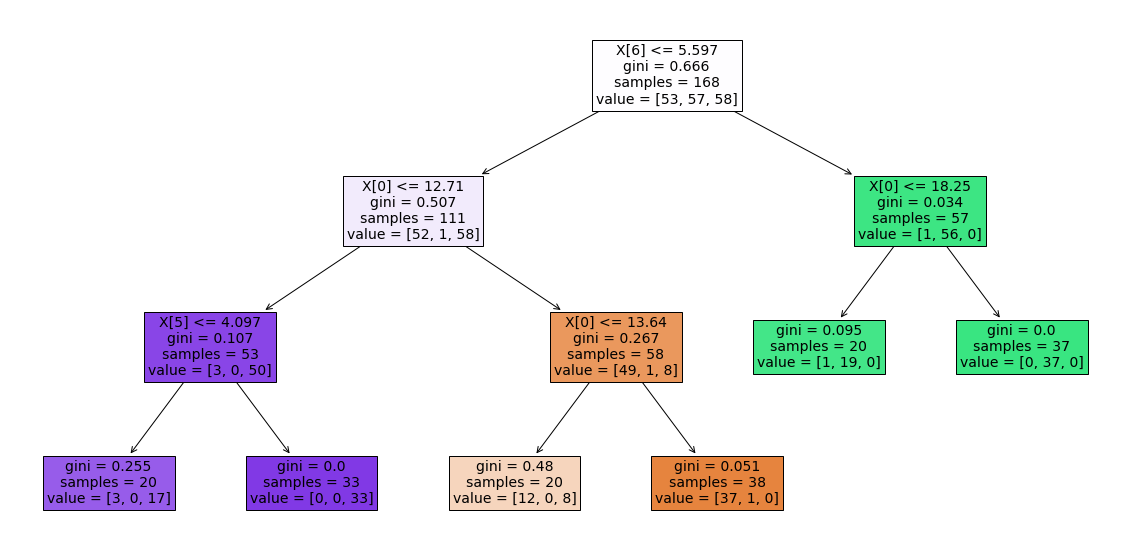

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_min_leaf, filled=True, fontsize=14)

In [ ]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.9226190476190477
Train Confusion Matrix:
[[49  1  3]
 [ 1 56  0]
 [ 8  0 50]]
--------------------------------------------------
Test Accuracy : 0.9047619047619048
Test Confusion Matrix:
[[15  0  2]
 [ 1 12  0]
 [ 1  0 11]]


[Text(0.6666666666666666, 0.9, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.5, 0.7, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.3333333333333333, 0.5, 'X[6] <= 4.789\ngini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.5, 0.3, 'X[0] <= 12.71\ngini = 0.167\nsamples = 76\nvalue = [7, 0, 69]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.032\nsamples = 61\nvalue = [1, 0, 60]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.48\nsamples = 15\nvalue = [6, 0, 9]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.068\nsamples = 57\nvalue = [55, 2, 0]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.029\nsamples = 69\nvalue = [1, 68, 0]')]

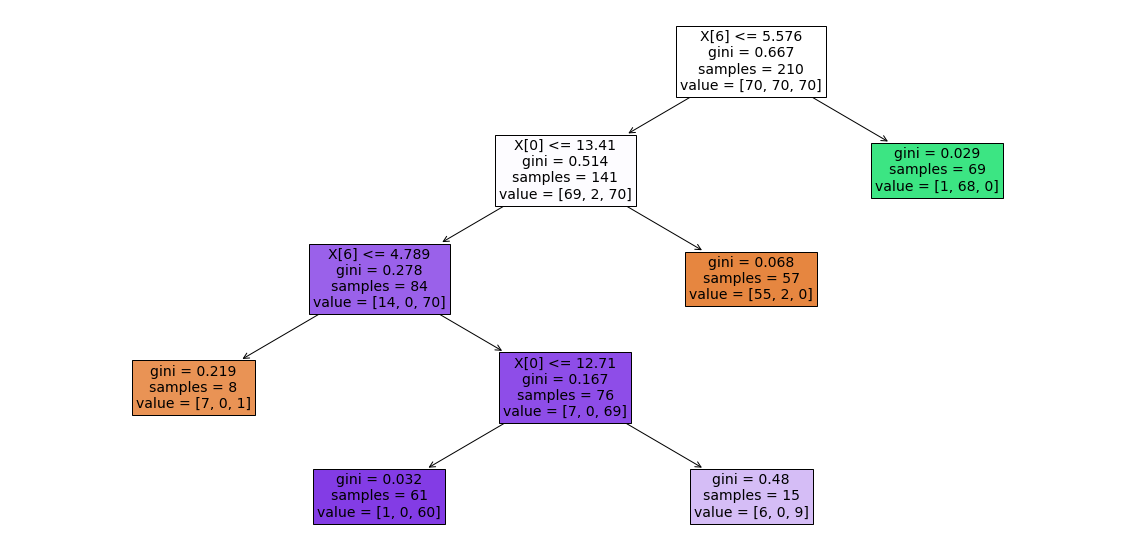

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(x, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

In [ ]:
evaluate_model(clf)

Train Accuracy : 0.9464285714285714
Train Confusion Matrix:
[[46  1  6]
 [ 1 56  0]
 [ 1  0 57]]
--------------------------------------------------
Test Accuracy : 0.9523809523809523
Test Confusion Matrix:
[[16  0  1]
 [ 1 12  0]
 [ 0  0 12]]


[Text(0.5769230769230769, 0.875, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.15384615384615385, 0.375, 'X[6] <= 4.789\ngini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.167\nsamples = 76\nvalue = [7, 0, 69]'),
 Text(0.46153846153846156, 0.375, 'X[4] <= 3.464\ngini = 0.068\nsamples = 57\nvalue = [55, 2, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2, 0]'),
 Text(0.8461538461538461, 0.625, 'X[5] <= 2.054\ngini = 0.029\nsamples = 69\nvalue = [1, 68, 0]'),
 Text(0.7692307692307693, 0.375, 'X[4] <= 3.768\ngini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.444\nsamples = 3\nvalue 

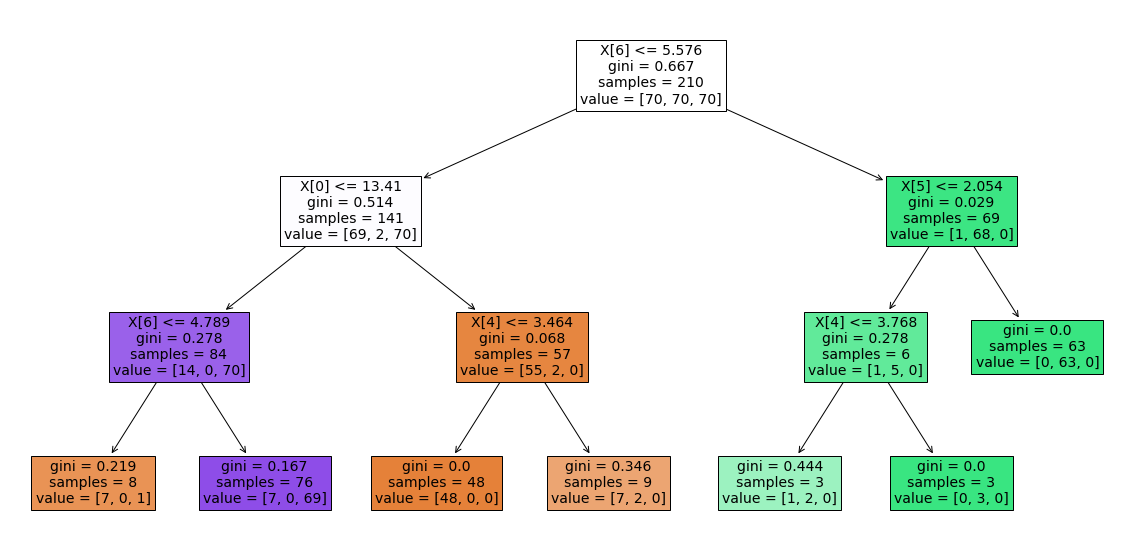

In [ ]:
dt_min_leaf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
dt_min_leaf1.fit(x, y)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_min_leaf1, filled=True, fontsize=14)

In [ ]:
evaluate_model(dt_min_leaf1)

Train Accuracy : 0.9464285714285714
Train Confusion Matrix:
[[46  1  6]
 [ 1 56  0]
 [ 1  0 57]]
--------------------------------------------------
Test Accuracy : 0.9523809523809523
Test Confusion Matrix:
[[16  0  1]
 [ 1 12  0]
 [ 0  0 12]]


**Using Entropy instead of Gini**

In [ ]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

[Text(0.5909090909090909, 0.875, 'X[6] <= 5.597\nentropy = 1.584\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.36363636363636365, 0.625, 'X[0] <= 13.41\nentropy = 1.063\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.18181818181818182, 0.375, 'X[5] <= 4.168\nentropy = 0.661\nsamples = 70\nvalue = [12, 0, 58]'),
 Text(0.09090909090909091, 0.125, 'entropy = 0.963\nsamples = 31\nvalue = [12, 0, 19]'),
 Text(0.2727272727272727, 0.125, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.5454545454545454, 0.375, 'X[4] <= 3.3\nentropy = 0.165\nsamples = 41\nvalue = [40, 1, 0]'),
 Text(0.45454545454545453, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'entropy = 0.286\nsamples = 20\nvalue = [19, 1, 0]'),
 Text(0.8181818181818182, 0.625, 'X[0] <= 18.25\nentropy = 0.127\nsamples = 57\nvalue = [1, 56, 0]'),
 Text(0.7272727272727273, 0.375, 'entropy = 0.286\nsamples = 20\nvalue = [1, 19, 0]'),
 Text(0.9090909090909091, 0.375, 'entropy = 0.0\ns

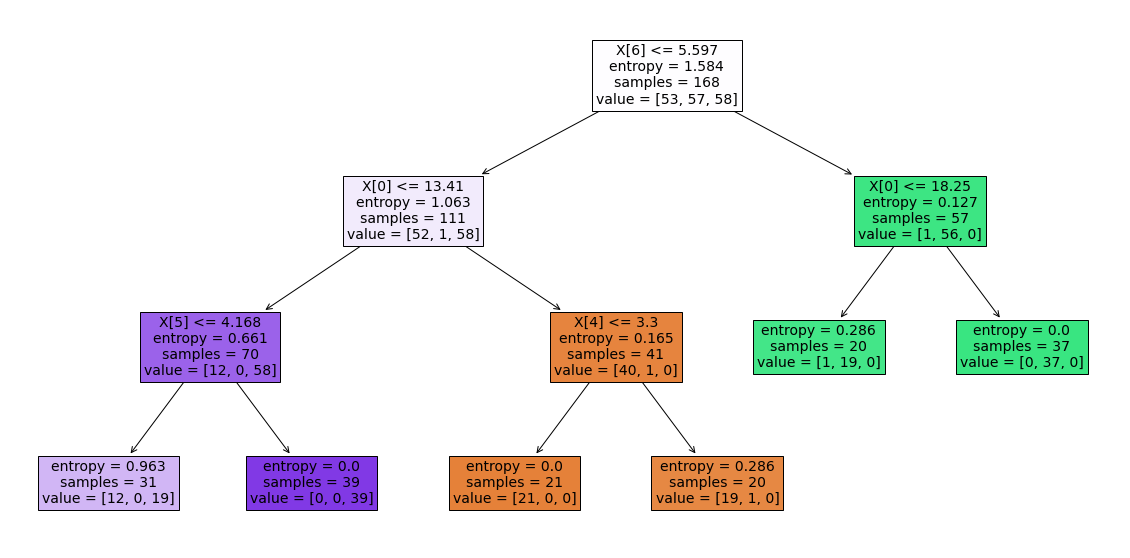

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_min_leaf_entropy, filled=True, fontsize=14)

In [ ]:
dt_min_leaf_gini = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="gini")
dt_min_leaf_gini.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

[Text(0.5909090909090909, 0.875, 'X[6] <= 5.597\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.36363636363636365, 0.625, 'X[0] <= 12.71\ngini = 0.507\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.18181818181818182, 0.375, 'X[5] <= 4.097\ngini = 0.107\nsamples = 53\nvalue = [3, 0, 50]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.255\nsamples = 20\nvalue = [3, 0, 17]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.5454545454545454, 0.375, 'X[0] <= 13.64\ngini = 0.267\nsamples = 58\nvalue = [49, 1, 8]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.48\nsamples = 20\nvalue = [12, 0, 8]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [37, 1, 0]'),
 Text(0.8181818181818182, 0.625, 'X[0] <= 18.25\ngini = 0.034\nsamples = 57\nvalue = [1, 56, 0]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.095\nsamples = 20\nvalue = [1, 19, 0]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'

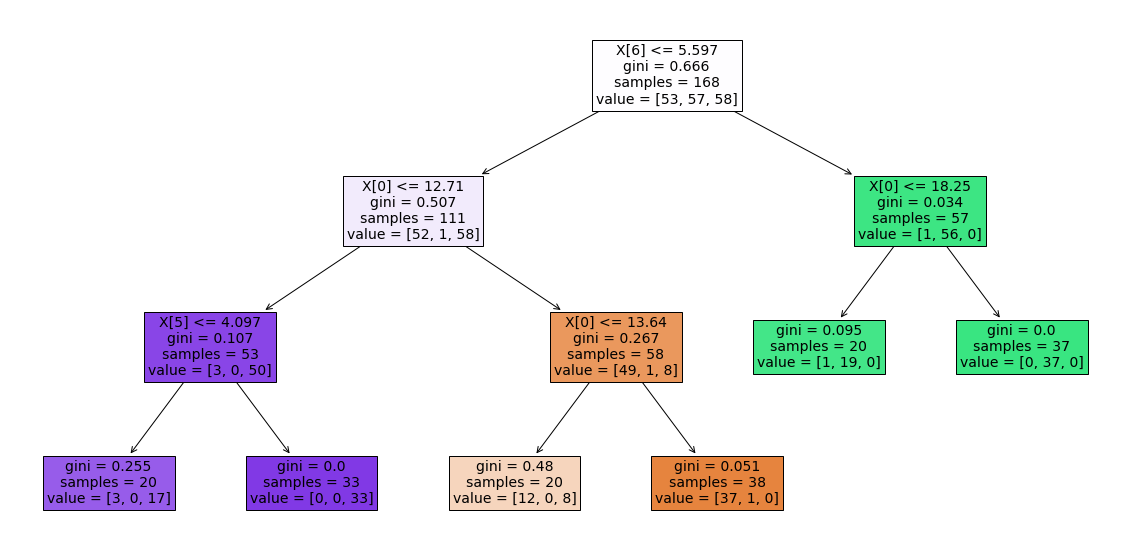

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_min_leaf_gini, filled=True, fontsize=14)

In [ ]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.9166666666666666
Train Confusion Matrix:
[[40  1 12]
 [ 1 56  0]
 [ 0  0 58]]
--------------------------------------------------
Test Accuracy : 0.9285714285714286
Test Confusion Matrix:
[[15  0  2]
 [ 1 12  0]
 [ 0  0 12]]


In [ ]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="gini")
dt_min_leaf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

[Text(0.5909090909090909, 0.875, 'X[6] <= 5.597\ngini = 0.666\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.36363636363636365, 0.625, 'X[0] <= 12.71\ngini = 0.507\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.18181818181818182, 0.375, 'X[5] <= 4.097\ngini = 0.107\nsamples = 53\nvalue = [3, 0, 50]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.255\nsamples = 20\nvalue = [3, 0, 17]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.5454545454545454, 0.375, 'X[0] <= 13.64\ngini = 0.267\nsamples = 58\nvalue = [49, 1, 8]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.48\nsamples = 20\nvalue = [12, 0, 8]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [37, 1, 0]'),
 Text(0.8181818181818182, 0.625, 'X[0] <= 18.25\ngini = 0.034\nsamples = 57\nvalue = [1, 56, 0]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.095\nsamples = 20\nvalue = [1, 19, 0]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'

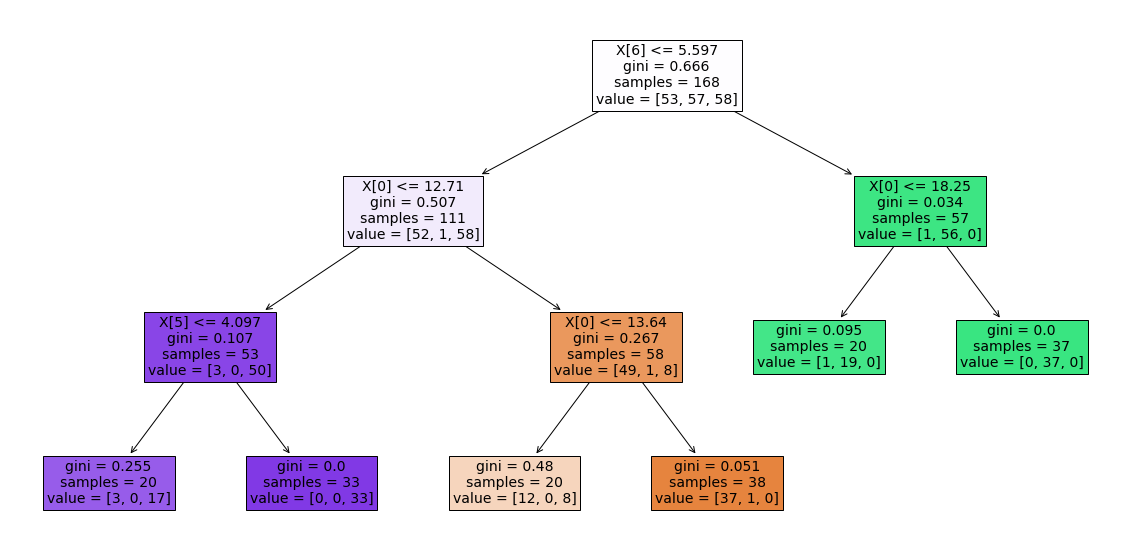

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_min_leaf_entropy, filled=True, fontsize=14)

**Hyper-parameter tuning**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4],
    'max_leaf_nodes':[2,3,5,10,20],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 1250 candidates, totalling 5000 fits
CPU times: user 4.56 s, sys: 171 ms, total: 4.73 s
Wall time: 21.2 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_leaf_nodes': [2, 3, 5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sample(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
198        0.003055      0.000037         0.002004        0.000022   
432        0.003493      0.000005         0.002155        0.000093   
1107       0.003889      0.000514         0.002120        0.000090   
684        0.003604      0.000622         0.004499        0.002519   
887        0.003461      0.000040         0.002076        0.000005   

     param_criterion param_max_depth param_max_leaf_nodes  \
198             gini               3                    5   
432             gini              10                    5   
1107         entropy              10                   20   
684          entropy               2                    5   
887          entropy               5                    2   

     param_min_impurity_decrease param_min_samples_leaf  \
198                          0.4                     50   
432                          0.1                     20   
1107                         0.1                     20   
684                          0.1                    100   
887                          0.2                     20   

                                                 params  split0_test_score  \
198   {'criterion': 'gini', 'max_depth': 3, 'max_lea...           0.333333   
432   {'criterion': 'gini', 'max_depth': 10, 'max_le...           0.880952   
1107  {'criterion': 'entropy', 'max_depth': 10, 'max...           0.880952   
684   {'criterion': 'entropy', 'max_depth': 2, 'max_...           0.333333   
887   {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.666667   

      split1_test_score  split2_test_score  split3_test_score  \
198            0.333333           0.333333           0.333333   
432            0.904762           0.904762           0.928571   
1107           0.952381           0.880952           0.952381   
684            0.333333           0.333333           0.333333   
887            0.690476           0.666667           0.690476   

      mean_test_score  std_test_score  rank_test_score  
198          0.333333        0.000000              876  
432          0.904762        0.016836              265  
1107         0.916667        0.035714               40  
684          0.333333        0.000000              876  
887          0.678571        0.011905              481

In [ ]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
925        0.003806      0.000058         0.002111        0.000054   
1050       0.008665      0.004932         0.002269        0.000259   
1175       0.004216      0.000237         0.002351        0.000233   
950        0.003870      0.000054         0.002158        0.000016   
975        0.003852      0.000086         0.002100        0.000021   

     param_criterion param_max_depth param_max_leaf_nodes  \
925          entropy               5                    5   
1050         entropy              10                    5   
1175         entropy              20                    5   
950          entropy               5                   10   
975          entropy               5                   20   

     param_min_impurity_decrease param_min_samples_leaf  \
925                          0.0                      5   
1050                         0.0                      5   
1175                         0.0                      5   
950                          0.0                      5   
975                          0.0                      5   

                                                 params  split0_test_score  \
925   {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.880952   
1050  {'criterion': 'entropy', 'max_depth': 10, 'max...           0.880952   
1175  {'criterion': 'entropy', 'max_depth': 20, 'max...           0.880952   
950   {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.880952   
975   {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.880952   

      split1_test_score  split2_test_score  split3_test_score  \
925            0.976190           0.928571            1.00000   
1050           0.976190           0.928571            1.00000   
1175           0.976190           0.928571            1.00000   
950            0.952381           0.928571            0.97619   
975            0.952381           0.928571            0.97619   

      mean_test_score  std_test_score  rank_test_score  
925          0.946429        0.045721                1  
1050         0.946429        0.045721                1  
1175         0.946429        0.045721                1  
950          0.934524        0.035215                4  
975          0.934524        0.035215                4

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5,
                       min_samples_leaf=5, random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.9642857142857143
Train Confusion Matrix:
[[49  1  3]
 [ 1 56  0]
 [ 1  0 57]]
--------------------------------------------------
Test Accuracy : 0.9285714285714286
Test Confusion Matrix:
[[15  0  2]
 [ 1 12  0]
 [ 0  0 12]]


[Text(0.7142857142857143, 0.9, 'X[6] <= 5.597\nentropy = 1.584\nsamples = 168\nvalue = [53, 57, 58]'),
 Text(0.5714285714285714, 0.7, 'X[0] <= 13.41\nentropy = 1.063\nsamples = 111\nvalue = [52, 1, 58]'),
 Text(0.42857142857142855, 0.5, 'X[5] <= 4.168\nentropy = 0.661\nsamples = 70\nvalue = [12, 0, 58]'),
 Text(0.2857142857142857, 0.3, 'X[0] <= 12.71\nentropy = 0.963\nsamples = 31\nvalue = [12, 0, 19]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.592\nsamples = 21\nvalue = [3, 0, 18]'),
 Text(0.42857142857142855, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [9, 0, 1]'),
 Text(0.5714285714285714, 0.3, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.7142857142857143, 0.5, 'entropy = 0.165\nsamples = 41\nvalue = [40, 1, 0]'),
 Text(0.8571428571428571, 0.7, 'entropy = 0.127\nsamples = 57\nvalue = [1, 56, 0]')]

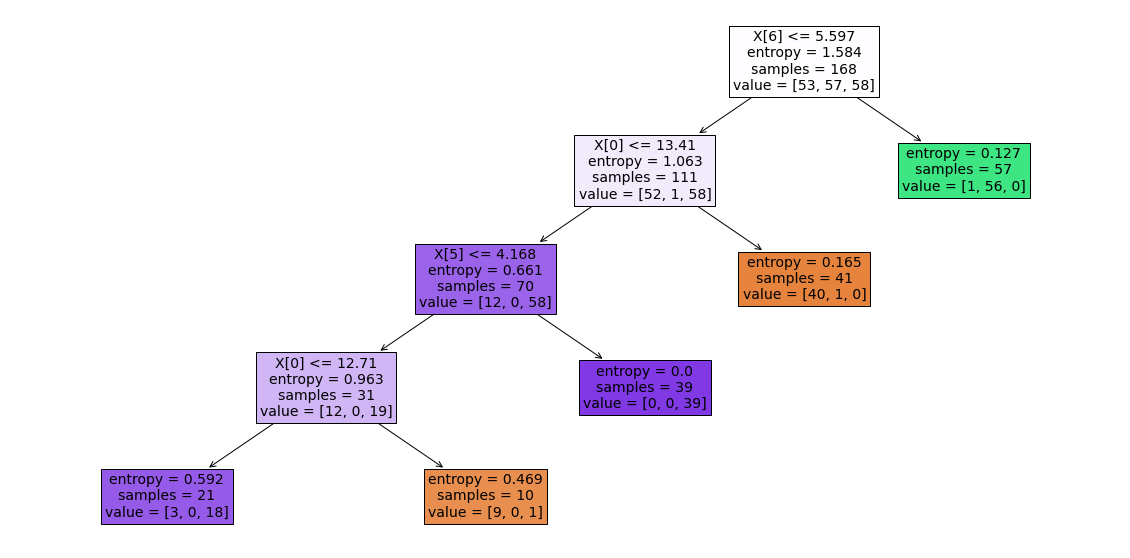

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_best, filled=True, fontsize=14)

In [ ]:
print(classification_report(y_test, dt_best.predict(x_test)))

              precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92        12

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.93      0.93      0.93        42



In [ ]:
pip install -q pydot


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pybaobabdt
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier().fit(X5,y)



In [ ]:
features = list(df.columns)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 720x720 with 0 Axes>

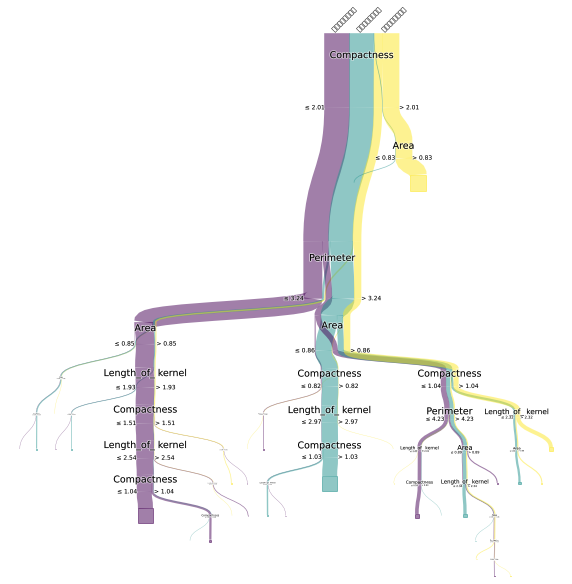

In [ ]:
ax = pybaobabdt.drawTree(clf, size=10, dpi=72, features=features)

In [ ]:
ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)

In [ ]:
import pybaobabdt
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)
clf.fit(X5, y)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)


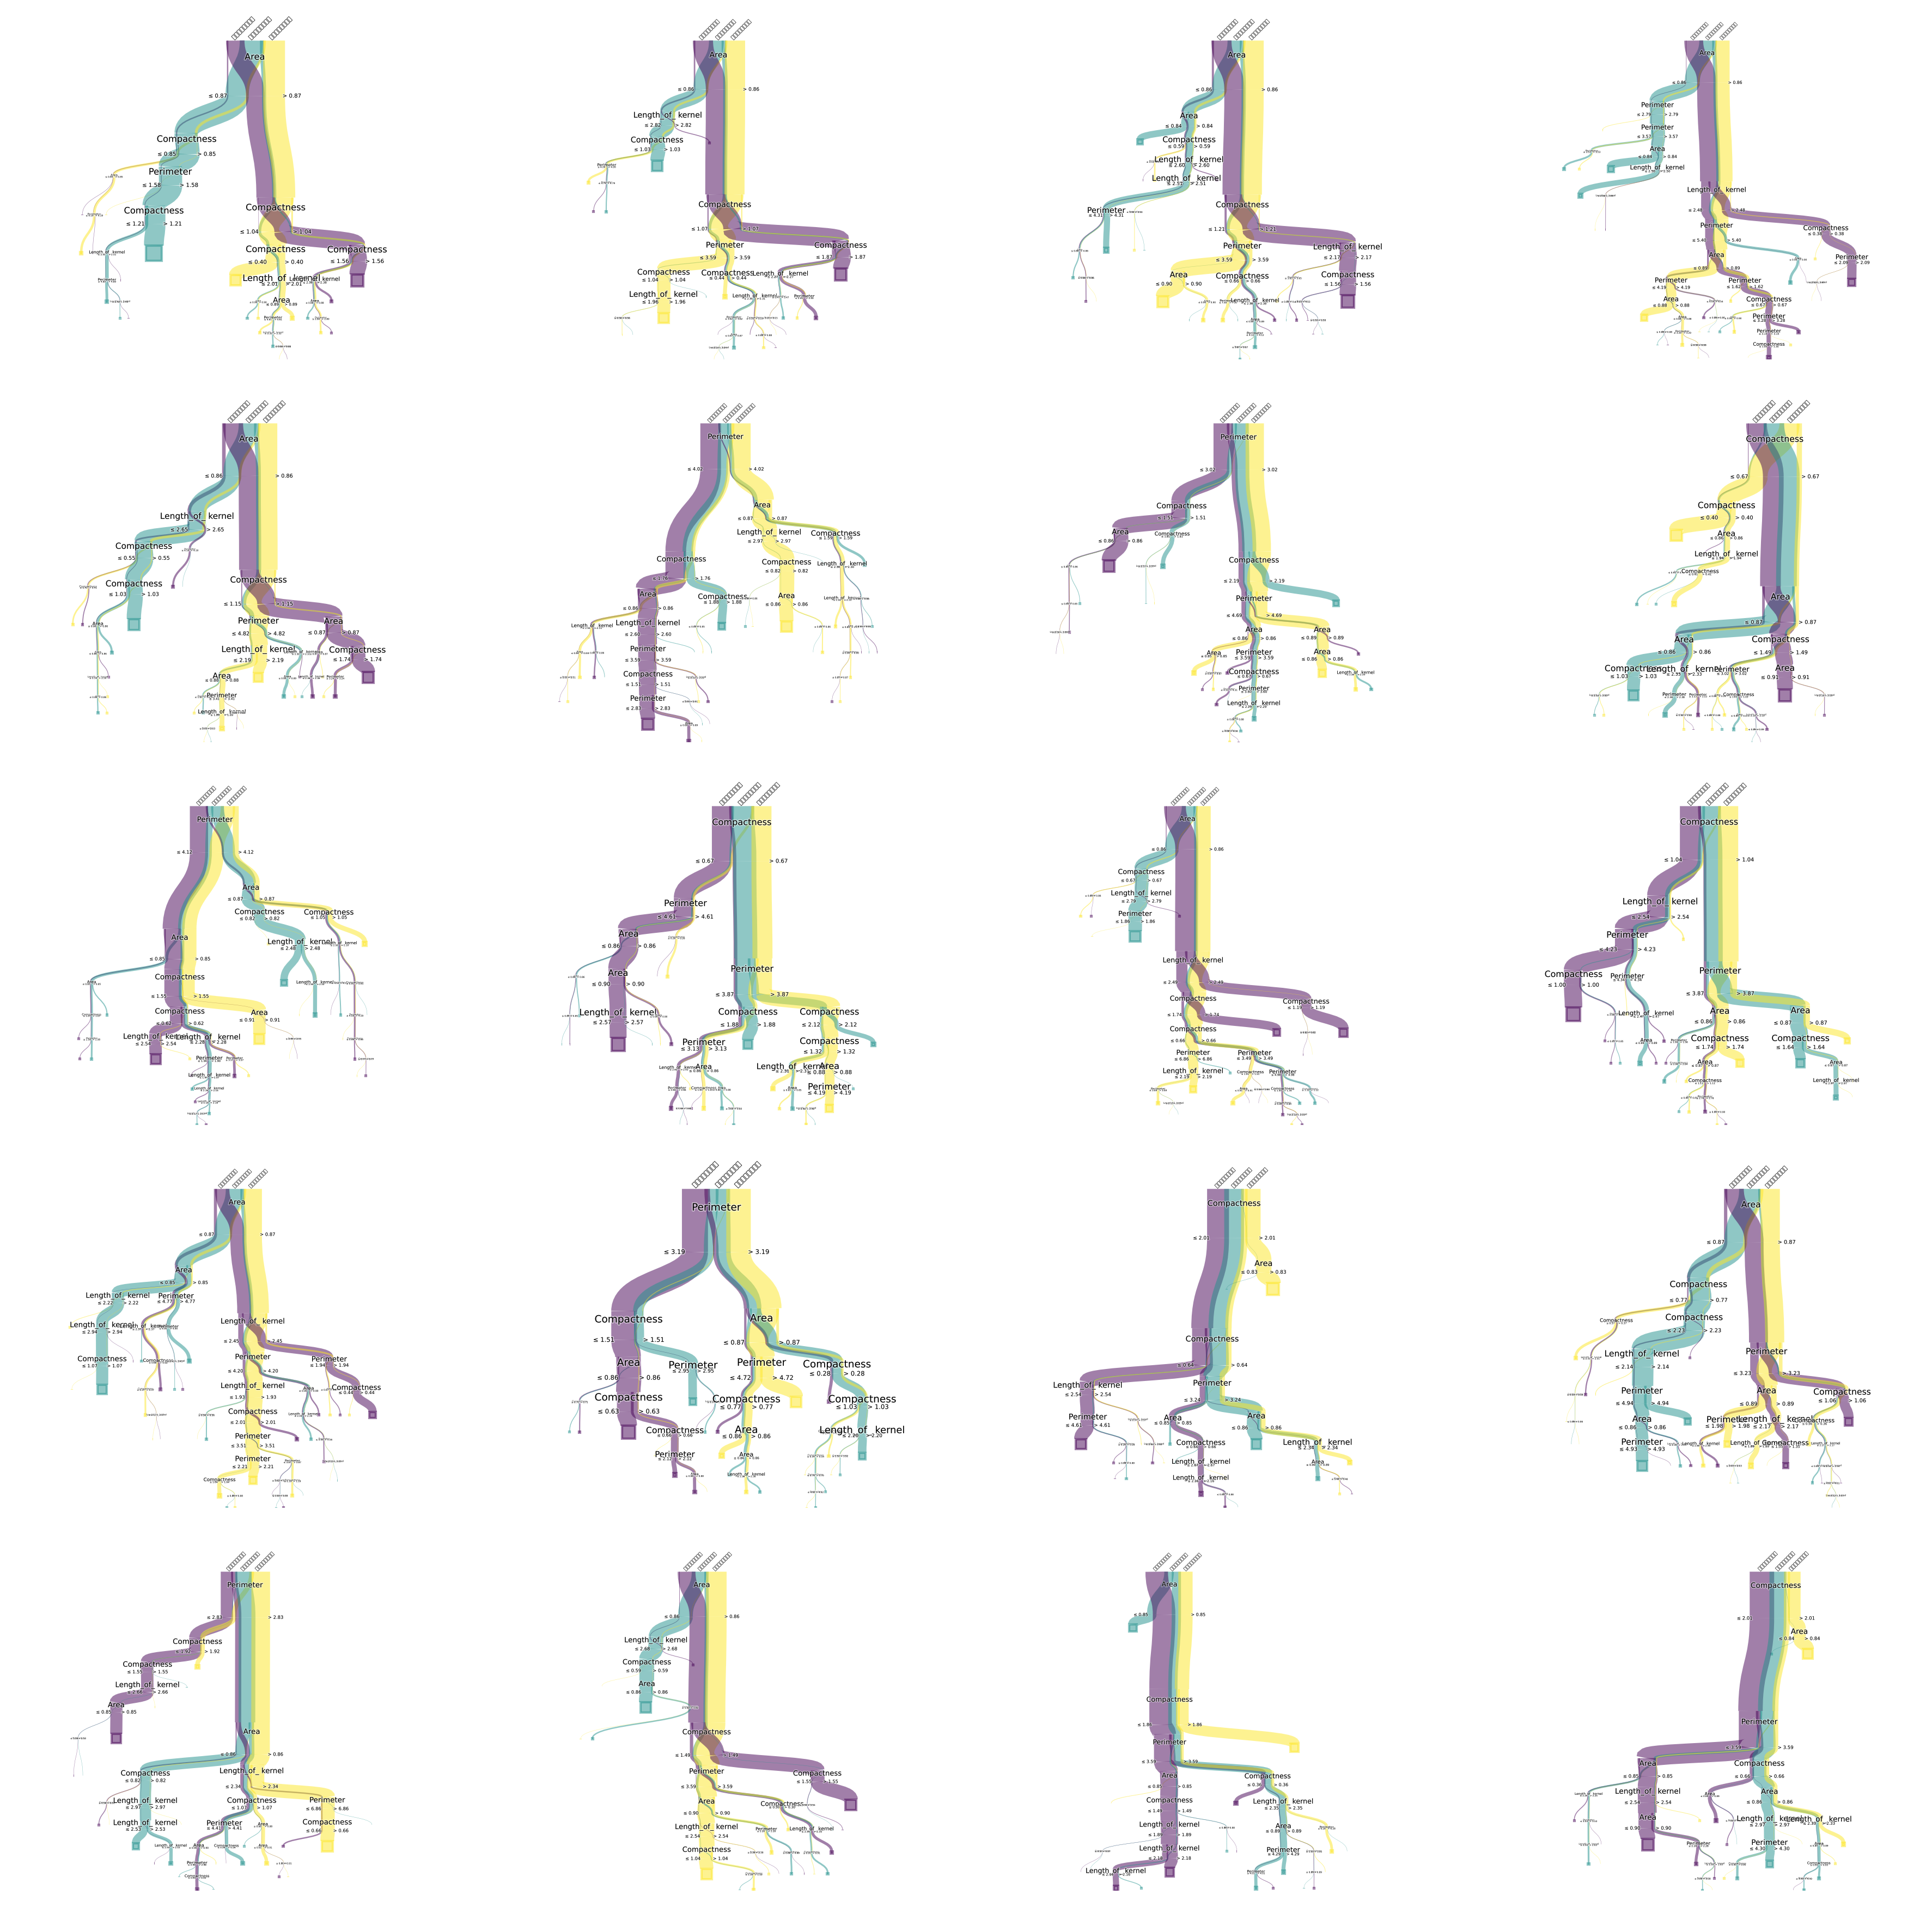

In [ ]:
size = (15,15)
plt.rcParams['figure.figsize'] = size
fig = plt.figure(figsize=size, dpi=300)

for idx, tree in enumerate(clf.estimators_):
    ax1 = fig.add_subplot(5, 4, idx+1)
    pybaobabdt.drawTree(tree, model=clf, size=15, dpi=300, features=features, ax=ax1)
    
fig.savefig('random-forest.png', format='png', dpi=1200, transparent=True)